In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
data = pd.read_csv('../out/study5.csv')
print("shape: ", data.shape)
POS = data["pos"].unique()
CONF = data["conf"].unique()
data.head()

shape:  (25, 16)


,trial,FNR,FPR,TNR,TPR,accuracy,f05,f1,f2,mcc,precision,recall,sensitivity,specificity,pos,conf
0,pos_1-conf_1,0.000058,0.886248,0.113752,0.999942,0.202214,0.135231,0.200016,0.384152,0.112221,0.111218,0.999942,0.999942,0.113752,1,1
1,pos_1-conf_3,0.011229,0.419805,0.580195,0.988771,0.620984,0.245956,0.342145,0.562398,0.341255,0.207148,0.988771,0.988771,0.580195,1,3
2,pos_1-conf_5,0.107115,0.109904,0.890096,0.892885,0.890370,0.522787,0.618450,0.757801,0.600353,0.474028,0.892885,0.892885,0.890096,1,5
3,pos_1-conf_7,0.417509,0.011004,0.988996,0.582491,0.948408,0.780230,0.691412,0.621483,0.679663,0.854382,0.582491,0.582491,0.988996,1,7
4,pos_1-conf_9,0.885325,0.000044,0.999956,0.114675,0.911554,0.386267,0.204258,0.139051,0.319417,0.996731,0.114675,0.114675,0.999956,1,9


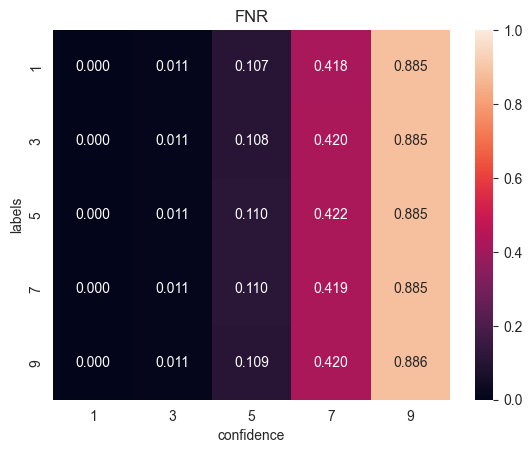

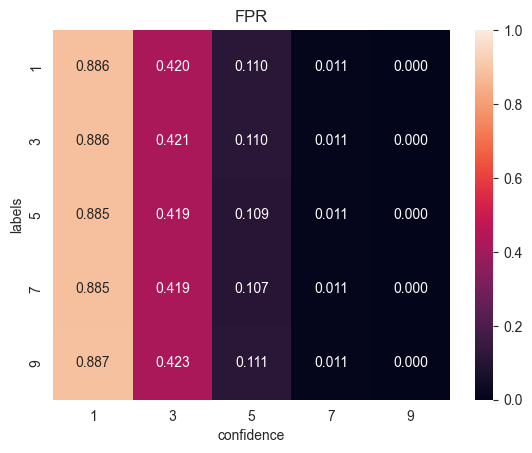

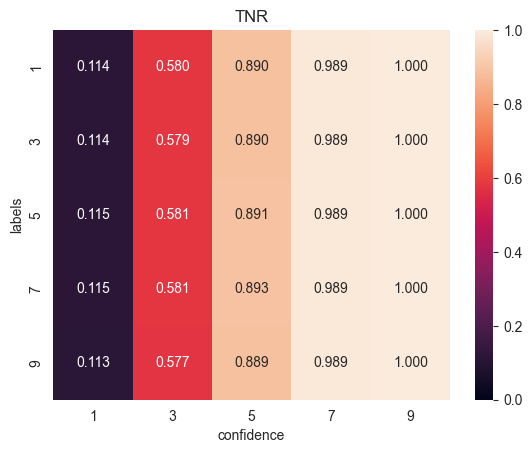

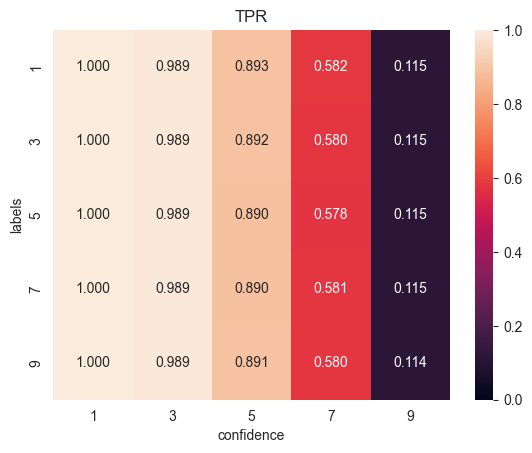

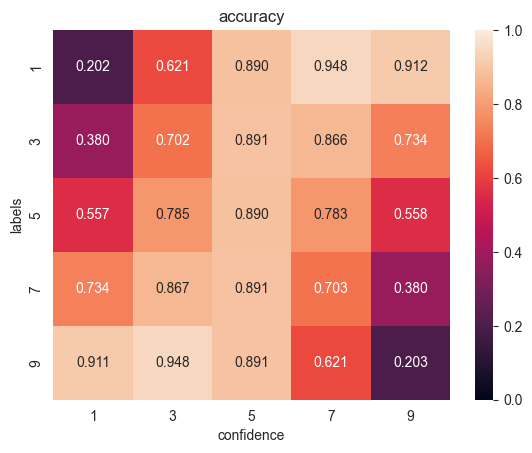

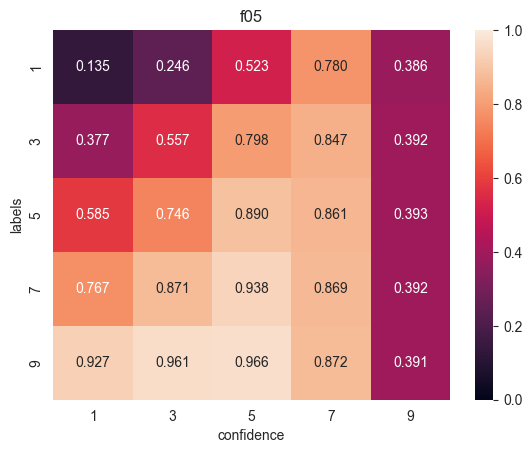

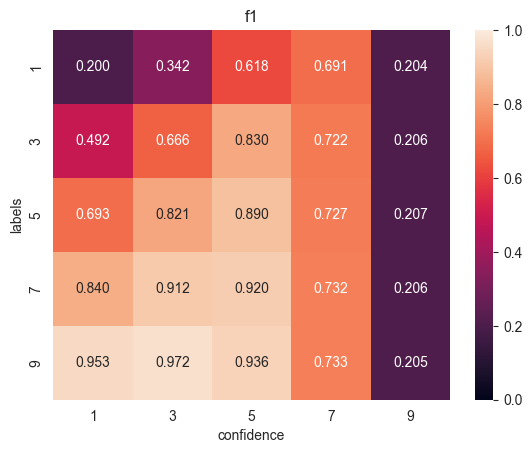

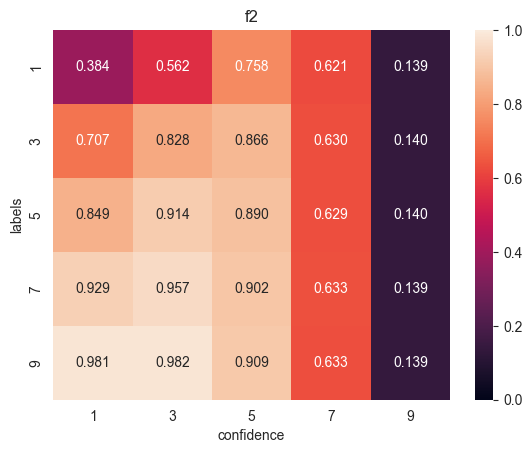

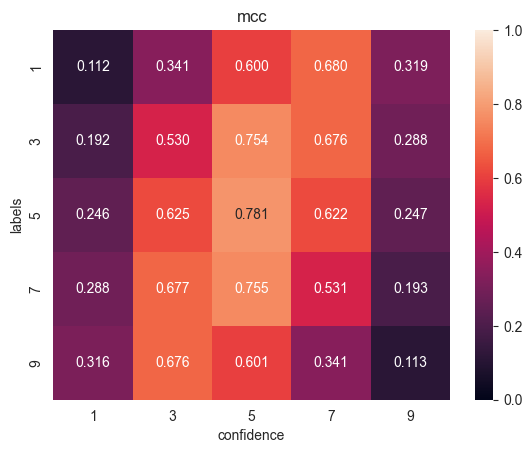

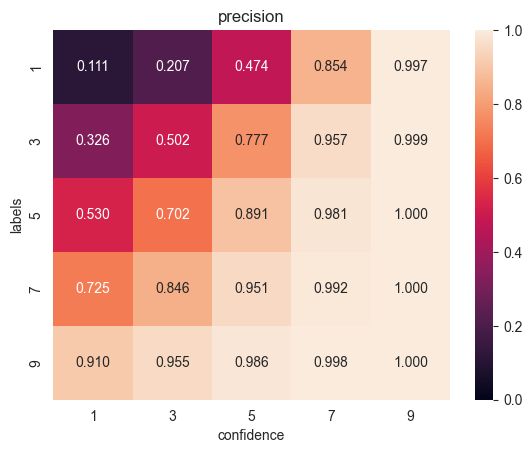

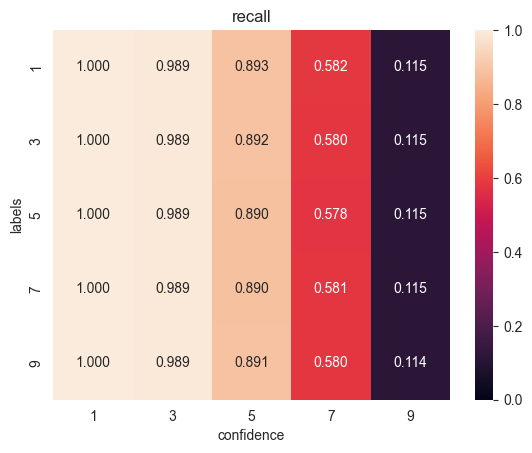

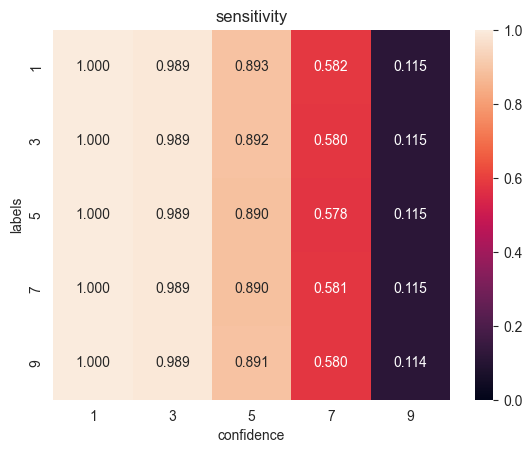

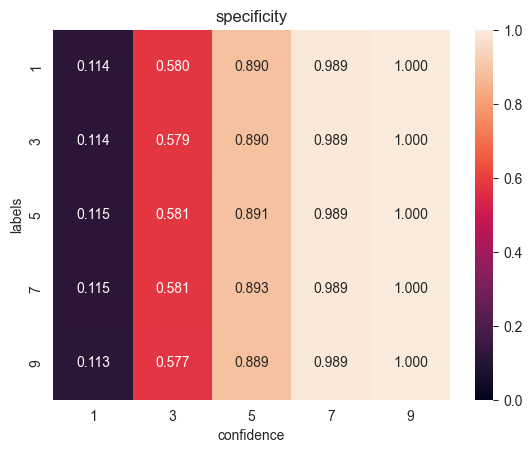

In [28]:
# plot heatmap for each column
for i in range(1, 14):
    title = data.columns[i]
    sns.heatmap(data.iloc[:, i].values.reshape(len(POS), len(CONF)), annot=True, 
                fmt=".3f", vmin=0, vmax=1, xticklabels=CONF, yticklabels=POS)
    plt.title(title)
    plt.xlabel("confidence")
    plt.ylabel("labels")
    plt.savefig(f'../out/study5_{title}.png', dpi=300)
    plt.show()

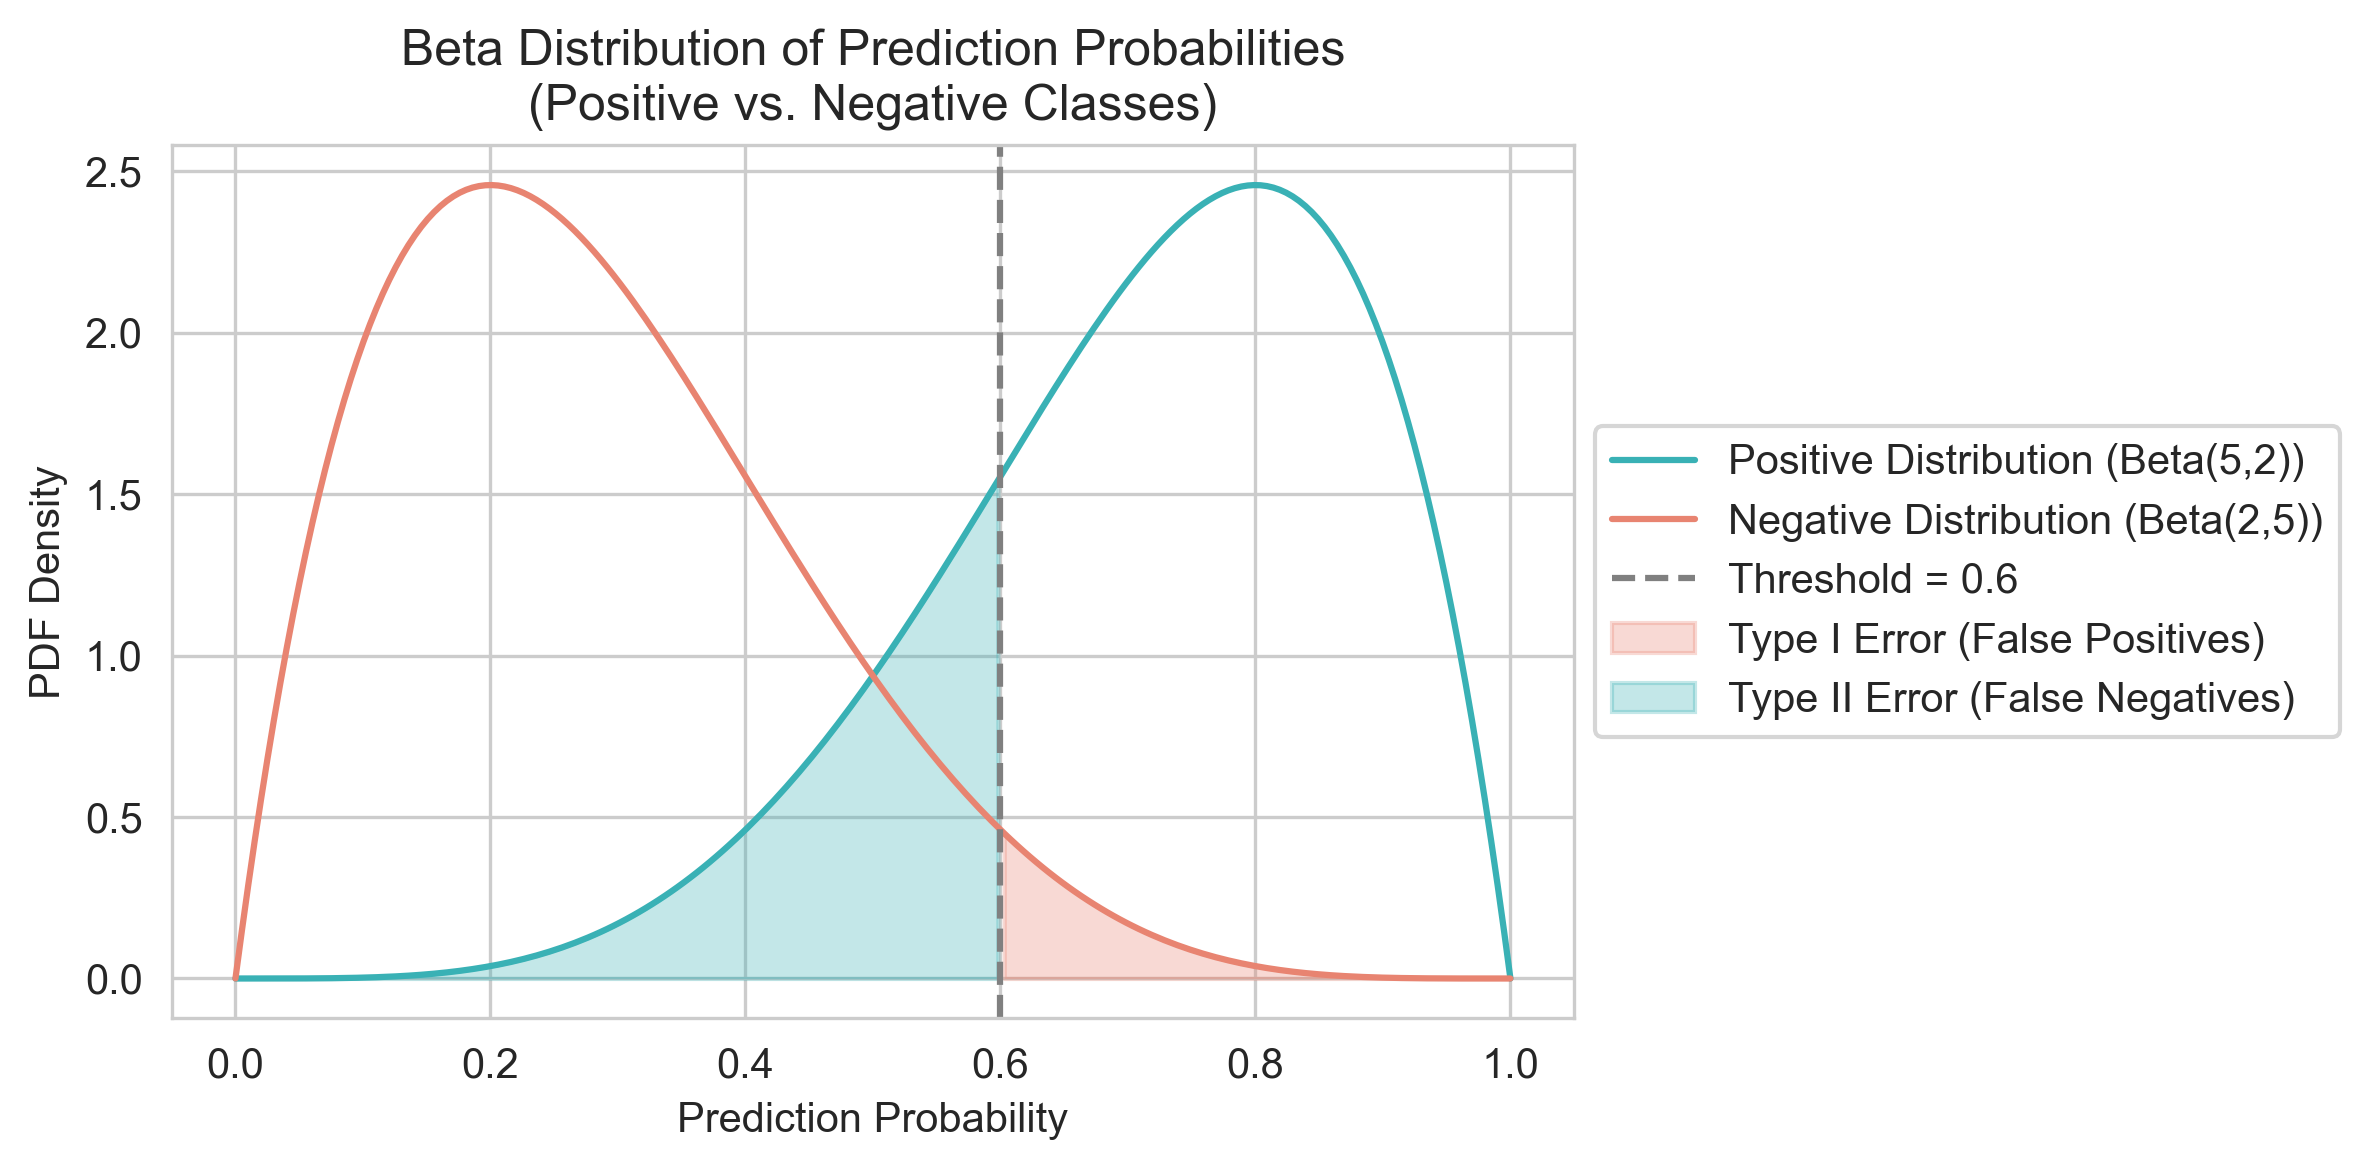

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

palette = ["#39B1B5", "#E88471"]

# --- 1. Define Beta parameters ---
a_pos, b_pos = 5, 2   # Positive distribution ~ Beta(5, 2)
a_neg, b_neg = 2, 5   # Negative distribution ~ Beta(2, 5)

# --- 2. Create an x-axis for the PDF (0 to 1) ---
x = np.linspace(0, 1, 200)

# --- 3. Compute PDFs for positive and negative classes ---
pdf_pos = beta.pdf(x, a_pos, b_pos)
pdf_neg = beta.pdf(x, a_neg, b_neg)

# --- 4. Choose a threshold ---
threshold = 0.6

# --- 5. Plot the PDFs ---
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4), dpi=300)
sns.lineplot(x=x, y=pdf_pos, label='Positive Distribution (Beta(5,2))', color=palette[0])
sns.lineplot(x=x, y=pdf_neg, label='Negative Distribution (Beta(2,5))', color=palette[1])

# --- 6. Draw a vertical line at the threshold ---
plt.axvline(threshold, color='grey', linestyle='--', label=f'Threshold = {threshold}')

# --- 7. Shade Type I and Type II error regions ---
mask = x >= threshold
plt.fill_between(
    x[mask], 
    pdf_neg[mask], 
    color=palette[1], alpha=0.3,
    label='Type I Error (False Positives)'
)
plt.fill_between(
    x[~mask], 
    pdf_pos[~mask], 
    color=palette[0], alpha=0.3,
    label='Type II Error (False Negatives)'
)

# --- 8. Cosmetic improvements ---
plt.title('Beta Distribution of Prediction Probabilities\n(Positive vs. Negative Classes)')
plt.xlabel('Prediction Probability')
plt.ylabel('PDF Density')
# leave the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../out/study5_PDF.png', dpi=300)
plt.show()